In [39]:
import numpy
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import IPython.display as ipd
import numpy as np


In [59]:
#list files in directory ./audio
l = []
for file in os.listdir('./audio'):
    l.append(file)
tone = [f for f in l if 'tone' in f]
chirp = [f for f in l if 'chirp' in f]
l

['tone_mic_diff_5000Hz_20250619_101846_20250619_101846.wav',
 'background_mic_diff_5000Hz_20250619_165727_20250619_165727.wav',
 'chirp_mic_diff_1000Hz_20250618_182731_20250618_182731.wav',
 'tone_mic_diff_1000Hz_20250619_102302_20250619_102302.wav',
 'bg_diff_1000Hz_20250619_165231_20250619_165231.wav',
 'chirp_mic_diff_5000Hz_20250618_183530_20250618_183530.wav']

In [41]:
chirp_1000 = [f for f in chirp if '1000' in f][0]
y1, sr1 = librosa.load(f'./audio/{chirp_1000}', sr=None)


target_sr = 22050
y_play = librosa.resample(y1, orig_sr=sr1, target_sr=target_sr,
                          res_type="kaiser_fast")        # fast + OK quality

# listen
ipd.Audio(y_play, rate=target_sr)

In [42]:
chirp_5000 = [f for f in chirp if '5000' in f][0]
y5, sr5 = librosa.load(f'./audio/{chirp_5000}', sr=None)

target_sr = 22050
y_play = librosa.resample(y5, orig_sr=sr5, target_sr=target_sr,
                          res_type="kaiser_fast")        # fast + OK quality

ipd.Audio(y_play, rate=target_sr)

In [60]:
bg = [f for f in l if 'background_mic_diff_5000Hz' in f][-1]
y_bg, sr_bg = librosa.load(f'./audio/{bg}', sr=None)

target_sr = 22050
y_play = librosa.resample(y_bg, orig_sr=sr_bg, target_sr=target_sr,
                          res_type="kaiser_fast")        # fast + OK quality
ipd.Audio(y_play, rate=target_sr)

Text(0.5, 1.0, '5 kHz SR chirp 300->500Hz')

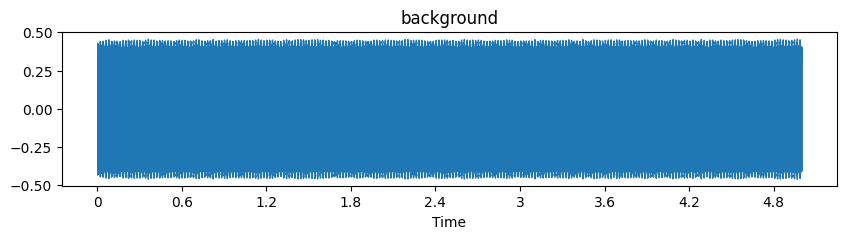

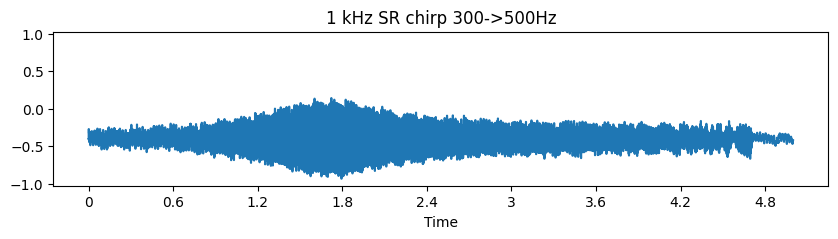

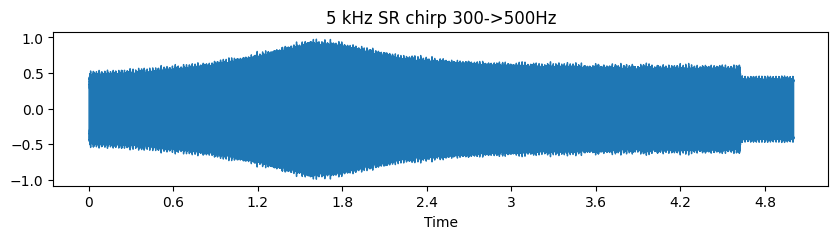

In [65]:
#plot the waveform of the chirp files and their spectrogram
plt.figure(figsize=(10, 2))
librosa.display.waveshow(y_bg, sr=sr_bg)
plt.title("background")

plt.figure(figsize=(10, 2))
librosa.display.waveshow(y1, sr=sr1)
plt.title("1 kHz SR chirp 300->500Hz")

plt.figure(figsize=(10, 2))
librosa.display.waveshow(y5, sr=sr5)
plt.title("5 kHz SR chirp 300->500Hz")

/Users/wota/projects/acoustic/.venv/lib/python3.10/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


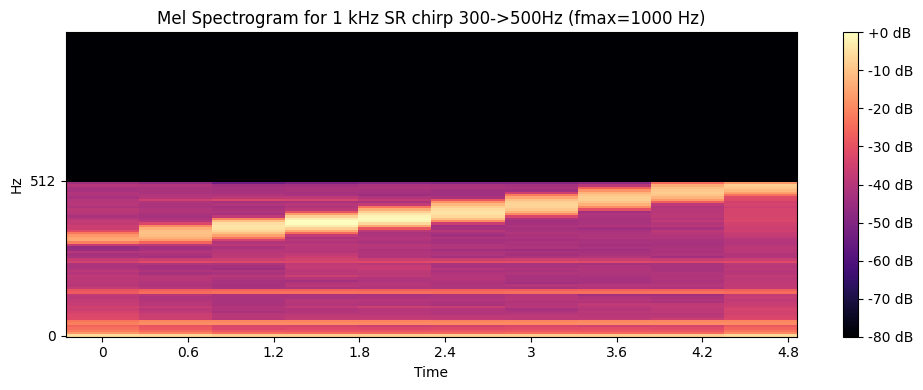

In [112]:
S1 = librosa.feature.melspectrogram(y=y1, sr=sr1, fmax=1000)

# Convert to dB
S1_db = librosa.power_to_db(S1, ref=np.max)

# Plot side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 1, 1)
librosa.display.specshow(S1_db, x_axis='time', y_axis='mel', sr=sr1, fmax=1000, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram for 1 kHz SR chirp 300->500Hz (fmax=1000 Hz)')

plt.tight_layout()
plt.show()

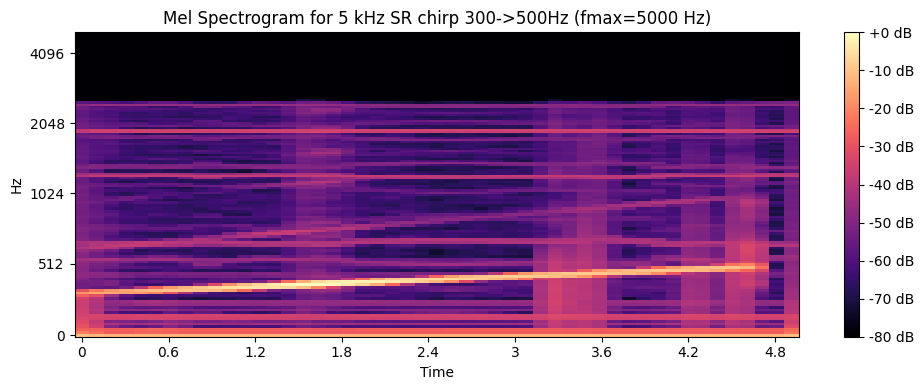

In [113]:
# Compute Mel spectrograms with different fmax values
S2 = librosa.feature.melspectrogram(y=y5, sr=sr5, fmax=5000)

# Convert to dB
S2_db = librosa.power_to_db(S2, ref=np.max)

# Plot side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 1, 1)
librosa.display.specshow(S2_db, x_axis='time', y_axis='mel', sr=sr5, fmax=5000, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram for 5 kHz SR chirp 300->500Hz (fmax=5000 Hz)')

plt.tight_layout()
plt.show()

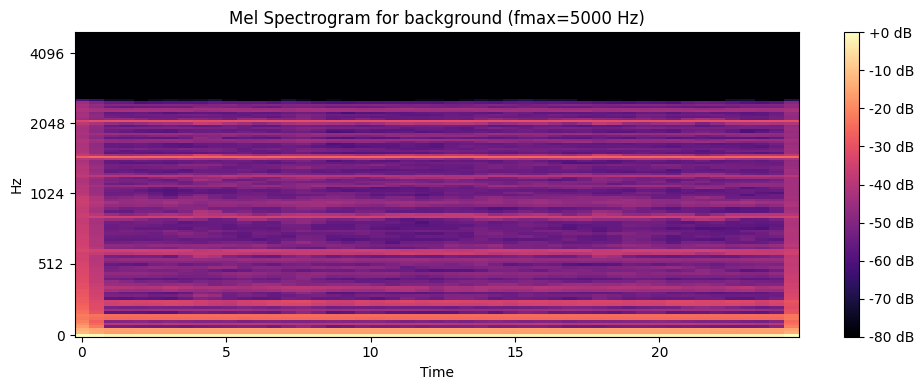

In [114]:
S0 = librosa.feature.melspectrogram(y=y_bg, sr=sr_bg, fmax=5000)

# Convert to dB
S0_db = librosa.power_to_db(S0, ref=np.max)

# Plot side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 1, 1)
librosa.display.specshow(S0_db, x_axis='time', y_axis='mel', sr=sr1, fmax=5000, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram for background (fmax=5000 Hz)')

plt.tight_layout()
plt.show()